<a href="https://colab.research.google.com/github/pajochain/SARSproject2023/blob/main/PJT_SARSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### SARS-Sample, your pipeline should be able to process any of these two samples.
#Short reads
!gdown 1J6nku7fSKE5t9yGgw0m1sUGy6regdmeb
!gdown 1e05YYPAHcKEjNYgwMntknvKY-Je-W2bh

#Long reads
!gdown 1fI7ewh0COZ4ODyUjx5xz_sgToBQSpb7W
!gdown 1FyLU_Eehf9R3z2SiVp-Gu5BQNoWMuB7M

Downloading...
From: https://drive.google.com/uc?id=1J6nku7fSKE5t9yGgw0m1sUGy6regdmeb
To: /content/SARS.R2.fastq
100% 154M/154M [00:03<00:00, 49.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e05YYPAHcKEjNYgwMntknvKY-Je-W2bh
To: /content/SARS.R1.fastq
100% 154M/154M [00:03<00:00, 44.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fI7ewh0COZ4ODyUjx5xz_sgToBQSpb7W
To: /content/SARS-LONG-EDT.R2.fastq
100% 189M/189M [00:04<00:00, 42.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FyLU_Eehf9R3z2SiVp-Gu5BQNoWMuB7M
To: /content/SARS-LONG-EDT.R1.fastq
100% 189M/189M [00:02<00:00, 65.6MB/s]


In [ ]:
#Installs necessary tools for the pipeline
!sudo apt-get install -y default-jre
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod +x FastQC/fastqc
!pip install cutadapt
!./FastQC/fastqc --version
!apt install bwa
!apt install samtools
!apt install bcftools
!pip install cyvcf2

##Downloads SARS reference genome and unzips it
!wget http://ftp.ensemblgenomes.org/pub/viruses/fasta/sars_cov_2/dna/Sars_cov_2.ASM985889v3.dna.toplevel.fa.gz
!gzip -df *.gz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu

In [ ]:
#Trims fastq files. Length to be cut was determined using fastQC
!cutadapt  --cut 12 -o trimmed_SARS.R1.fastq -p trimmed_SARS.R2.fastq SARS.R1.fastq SARS.R2.fastq #removes the first 12 bases
!cutadapt  --cut 30 -o trimmed_SARS-LONG.R1.fastq -p trimmed_SARS-LONG.R2.fastq SARS-LONG-EDT.R1.fastq SARS-LONG-EDT.R2.fastq #removes the first 30 bases

This is cutadapt 4.6 with Python 3.10.12
Command line parameters: --cut 12 -o trimmed_SARS.R1.fastq -p trimmed_SARS.R2.fastq SARS.R1.fastq SARS.R2.fastq
Processing paired-end reads on 1 core ...
Done           00:00:07       679,555 reads @  11.2 µs/read;   5.37 M reads/minute
Finished in 7.595 s (11.177 µs/read; 5.37 M reads/minute).

=== Summary ===

Total read pairs processed:            679,555
Pairs written (passing filters):       679,555 (100.0%)

Total basepairs processed:   103,292,360 bp
  Read 1:    51,646,180 bp
  Read 2:    51,646,180 bp
Total written (filtered):     95,137,700 bp (92.1%)
  Read 1:    43,491,520 bp
  Read 2:    51,646,180 bp
This is cutadapt 4.6 with Python 3.10.12
Command line parameters: --cut 30 -o trimmed_SARS-LONG.R1.fastq -p trimmed_SARS-LONG.R2.fastq SARS-LONG-EDT.R1.fastq SARS-LONG-EDT.R2.fastq
Processing paired-end reads on 1 core ...
Done           00:00:08       327,457 reads @  26.0 µs/read;   2.31 M reads/minute
Finished in 8.514 s (25.999 µs/

In [ ]:
##ONLY RUN IF YOU WANT TO COMPARE QC FILES BEFORE AND AFTER TRIMMING
##THERE WILL BE A NOTIFICATION TO DOWNLOAD MULTIPLE FILES

# #performs fastqc on all .fastq files in working directory
# !./FastQC/fastqc *.fastq

# #downloads fastQC .html files
# from google.colab import files
# !ls | grep ".html" > list.txt
# fqc = open("list.txt").readlines()
# qc_files = [i.rstrip() for i in fqc]
# !rm list.txt
# for file in qc_files:
#   files.download(file)

In [ ]:
#Builds reference Sars genome from Ensembl
!bwa index -p SarsRef Sars_cov_2.ASM985889v3.dna.toplevel.fa

#Does pairwise alignment of forward and reverse sequence against the indexed reference genome using bwa
#For sars short
!bwa aln SarsRef trimmed_SARS.R1.fastq > SARS.R1.sai
!bwa aln SarsRef trimmed_SARS.R2.fastq > SARS.R2.sai
!bwa sampe SarsRef SARS.R1.sai SARS.R2.sai  trimmed_SARS.R1.fastq trimmed_SARS.R2.fastq > SARS.bam

#For for sars long
!bwa aln SarsRef trimmed_SARS-LONG.R1.fastq > SARS-LONG.R1.sai
!bwa aln SarsRef trimmed_SARS-LONG.R2.fastq > SARS-LONG.R2.sai
!bwa sampe SarsRef SARS-LONG.R1.sai SARS-LONG.R2.sai  trimmed_SARS-LONG.R1.fastq trimmed_SARS-LONG.R2.fastq > SARS-LONG.bam

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.01 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -p SarsRef Sars_cov_2.ASM985889v3.dna.toplevel.fa
[main] Real time: 0.061 sec; CPU: 0.015 sec
[bwa_aln] 17bp reads: max_diff = 2
[bwa_aln] 38bp reads: max_diff = 3
[bwa_aln] 64bp reads: max_diff = 4
[bwa_aln] 93bp reads: max_diff = 5
[bwa_aln] 124bp reads: max_diff = 6
[bwa_aln] 157bp reads: max_diff = 7
[bwa_aln] 190bp reads: max_diff = 8
[bwa_aln] 225bp reads: max_diff = 9
[bwa_aln_core] calculate SA coordinate... 5.00 sec
[bwa_aln_core] write to the disk... 0.03 sec
[bwa_aln_core] 262144 sequences have been processed.
[bwa_aln_core] calculate SA coordinate... 6.80 sec
[bwa_aln_core] write to the disk... 0.03 sec
[bwa_aln_core] 524288 sequences have been processed.
[bwa_aln_core] 

In [ ]:
#Qualiity mapping using samtools with bam file and sorts it. Keeps alignments that have quality of atleast 12.
!samtools view -b -q 12 SARS.bam | samtools sort -o SARS.bam.sorted
!samtools view -b -q 12 SARS-LONG.bam | samtools sort -o SARS-LONG.bam.sorted

#Calls mpile program to generate a pilup from the bam file vs reference sequence and set a cut off at 2000 variants per site then calls the 'call'
#program to make variant calls from the pileup and allows for multiallelic sites or detection of multiple alleles at a single genomic position.
#Outputs variants only with a ploidy of 1
#the output will be a gzipped file that will then be unzipped.
!bcftools mpileup -f Sars_cov_2.ASM985889v3.dna.toplevel.fa --max-depth  2000 SARS.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o SARS.Variants.vcf.gz
!bcftools mpileup -f Sars_cov_2.ASM985889v3.dna.toplevel.fa --max-depth  2000 SARS-LONG.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o SARS-LONG.Variants.vcf.gz

!gzip -df *.vcf.gz

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [ ]:
import cyvcf2
import pandas
#These are variables containing the output file names from running bcftools
vcf_1 = "SARS.Variants.vcf"
vcf_2 = "SARS-LONG.Variants.vcf"

#Uses vcf reader cyvf2 to pull information into a tsv file that contains data with headers indicated in data_string variable
#These tsv files are to be used to create the final dataframes
vcf_reader1 = cyvcf2.VCF(vcf_1)
with open('sars.tsv', 'w') as file:
    for variant in vcf_reader1:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.INFO.get('DP')}\t{genotype}\n"
        file.write(data_string)

vcf_reader2 = cyvcf2.VCF(vcf_2)
with open('sars-long.tsv', 'w') as file:
    for variant in vcf_reader2:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.INFO.get('DP')}\t{genotype}\n"
        file.write(data_string)

#Dataframes of mutations for deliverables. Final dataframes will be styled for clarity
#Creates a dataframe of mutations in the short sars sample
columns = ['CHROM', 'POS','REF', 'ALT', 'QUAL', 'DP', 'GENOTYPE']
sars_df = pandas.read_csv("sars.tsv", sep = "\t", header=None, names= columns )
styled_sdf = sars_df.style.set_table_styles(
    [{"selector": "th", "props": [("font-size", "12pt"), ("text-align", "center"), ("color","red")]},
     {"selector": "td", "props": [("text-align", "center")]}]
).set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})

#Creates a dataframe of mutations in the long sars sample
sars_long_df = pandas.read_csv("sars-long.tsv", sep = "\t", header=None, names= columns )
styled_ldf = sars_long_df.style.set_table_styles(
    [{"selector": "th", "props": [("font-size", "12pt"), ("text-align", "center"), ("color","red")]},
     {"selector": "td", "props": [("text-align", "center")]}]
).set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})

#Dataframe with variants that are shared between the two sars genomes
#EXTRA CREDIT OPPORTUNITY
#I had a problem with figuring out how to compare 2 columns from different data frames and adding matches into a new dataframe while keeping necessary information to keep the identity of each of the matched mutations.
#Solution obtained from: https://stackoverflow.com/questions/71246157/compare-two-dataframes-and-add-values-from-another-column-where-rows-matched
merged_df = sars_df.merge(sars_long_df, how='inner', on='POS', suffixes=('_ShortSARS', '_LongSARS')) #merges the short and long sars mutation dataframes when the position values match
styled_mdf = merged_df.style.set_table_styles(
    [{"selector": "th", "props": [("font-size", "12pt"), ("text-align", "center"), ("color","red")]},
     {"selector": "td", "props": [("text-align", "center")]}]
).set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})




#Deliverable 1: Dataframe of mutations in the short SARS-CoV-2 genome.


In [ ]:
#Deliverable 1: Dataframe of mutations in the short SARS-CoV-2 genome.
styled_sdf

,CHROM,POS,REF,ALT,QUAL,DP,GENOTYPE
0,MN908947.3,21,C,T,43.414700,3,3
1,MN908947.3,241,C,T,228.432007,1592,3
2,MN908947.3,1387,C,T,225.421997,1861,3
3,MN908947.3,2832,A,G,228.429993,1672,3
4,MN908947.3,3037,C,T,225.417007,203,3
5,MN908947.3,5386,T,G,228.425003,672,3
6,MN908947.3,8393,G,A,225.417007,217,3
7,MN908947.3,10029,C,T,225.425995,1937,3
8,MN908947.3,10449,C,A,228.425003,1871,3
9,MN908947.3,11288,T,A,60.244900,723,3


#Deliverable 2: Dataframe of mutations in the long SARS-CoV-2 genome.

In [ ]:
#Deliverable 2: Dataframe of mutations in the long SARS-CoV-2 genome.
styled_ldf

,CHROM,POS,REF,ALT,QUAL,DP,GENOTYPE
0,MN908947.3,241,C,T,228.429993,2021,3
1,MN908947.3,3037,C,T,225.417007,1034,3
2,MN908947.3,11842,G,A,225.417007,970,3
3,MN908947.3,12759,A,G,225.421997,2003,3
4,MN908947.3,14408,C,T,225.421997,1999,3
5,MN908947.3,18292,G,T,225.421997,2005,3
6,MN908947.3,20268,A,G,225.425995,708,3
7,MN908947.3,23403,A,G,228.434998,816,3
8,MN908947.3,27813,C,T,228.425003,2002,3
9,MN908947.3,28854,C,T,228.431000,2006,3


#Deliverable 3: Dataframe of mutations shared between the short and long SARS-CoV-2 genomes.

In [ ]:
#Deliverable 3: Dataframe of mutations shared between the short and long SARS-CoV-2 genomes.
styled_mdf

,CHROM_ShortSARS,POS,REF_ShortSARS,ALT_ShortSARS,QUAL_ShortSARS,DP_ShortSARS,GENOTYPE_ShortSARS,CHROM_LongSARS,REF_LongSARS,ALT_LongSARS,QUAL_LongSARS,DP_LongSARS,GENOTYPE_LongSARS
0,MN908947.3,241,C,T,228.432007,1592,3,MN908947.3,C,T,228.429993,2021,3
1,MN908947.3,3037,C,T,225.417007,203,3,MN908947.3,C,T,225.417007,1034,3
2,MN908947.3,14408,C,T,225.417007,345,3,MN908947.3,C,T,225.421997,1999,3
3,MN908947.3,23403,A,G,228.431000,1993,3,MN908947.3,A,G,228.434998,816,3


In [ ]:
#Dataframes of mutations for plot creation
#This is a list of bases that will be used for for loops.
bases = ['A', 'T', 'C', 'G']

#Empty dataframes are created first before columns are filled in by appending values that meet conditionals
#Double for loops are nested to compare bases from the bases list. It first looks at the reference base then the alternate base and finally the depth DP from the mutations dataframes
#The mutations and their counts are then added to a new dataframe
#This was done for the short sars, long sars, and merged sars which are the mutations that are present in both short and long sequences.

#Short SARS
df_mutations_ssars = pandas.DataFrame(columns=['REF', 'ALT', 'COUNTS'])
for i in bases:
  for j in bases:
    counts =sars_df[ (sars_df['REF']== i ) & (sars_df['ALT']== j ) & (sars_df['DP'] > 20 )].size/7 #must divide by 7 since .size counts how many columns are present in the row when the conditionals are true instead of counting how many times the conditionals are true
    if i != j and counts >  0: #removes same base comparisons and mutation counts at 0 for a cleaner dataframe
      df_mutations_ssars =df_mutations_ssars.append({'REF': i, 'ALT': j, 'COUNTS': counts}, ignore_index=True)

#Long SARS
df_mutations_lsars = pandas.DataFrame(columns=['REF', 'ALT', 'COUNTS'])
for i in bases:
  for j in bases:
    counts =sars_long_df[ (sars_long_df['REF']== i ) & (sars_long_df['ALT']== j ) & (sars_long_df['DP'] > 20 )].size/7 #must divide by 7 since .size counts how many columns are present in the row when the conditionals are true instead of counting how many times the conditionals are true
    if i != j and counts >  0: #removes same base comparisons and mutation counts at 0 for a cleaner dataframe
      df_mutations_lsars = df_mutations_lsars.append({'REF': i, 'ALT': j, 'COUNTS': counts}, ignore_index=True)

#Merged SARS
df_mutations_msars = pandas.DataFrame(columns=['REF', 'ALT', 'COUNTS'])
for i in bases:
  for j in bases:
    counts =merged_df[ (merged_df['REF_ShortSARS']== i ) & (merged_df['ALT_ShortSARS']== j )].size/13 #must divide by 7 since .size counts how many columns are present in the row when the conditionals are true instead of counting how many times the conditionals are true
    if i != j and counts >  0: #removes same base comparisons and mutation counts at 0 for a cleaner dataframe
      df_mutations_msars = df_mutations_msars.append({'REF': i, 'ALT': j, 'COUNTS': counts}, ignore_index=True)

#Deliverable 4: Chart displaying some aspect of the data.

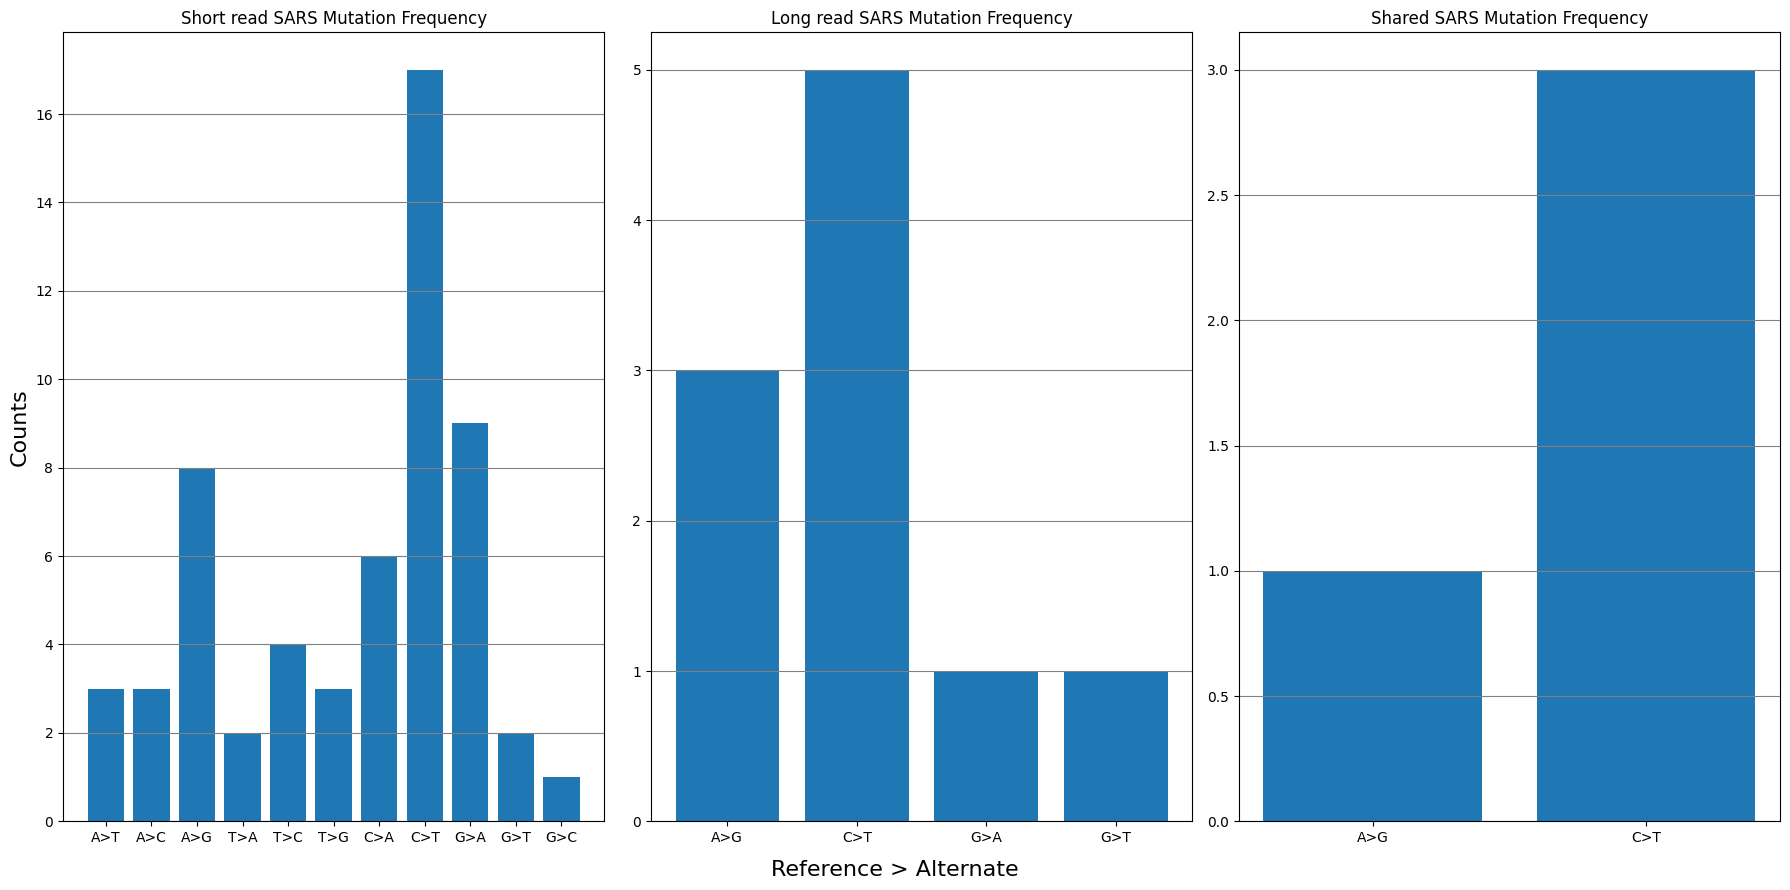

In [ ]:
#Deliverable 4: These charts display the types of mutations and their frequency in the short sars sample, long sars sample, and mutations shared between the short and long sars samples
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,9)) #creates a 1x3 figure to be populated by 3 plots

#SHORT SARS MUTATION TYPE AND NUMBER
#An empty dataframe is created first. The first column is filled with the combined values of REF and ALT columns. The second column is filled with the counts of mutations
#The first bar plot is then created with the mutations at the x-axis and counts at the y-axis
df_mut_combined = pandas.DataFrame(columns = ['REF>ALT', 'COUNTS'] )
df_mut_combined['REF>ALT'] = df_mutations_ssars['REF'] + '>' + df_mutations_ssars['ALT']
df_mut_combined['COUNTS'] = df_mutations_ssars['COUNTS']

mutations = df_mut_combined['REF>ALT']
counts = df_mut_combined['COUNTS']
ax1.bar(mutations, counts)


#LONG SARS MUTATION TYPE AND NUMBER
#An empty dataframe is created first. The first column is filled with the combined values of REF and ALT columns. The second column is filled with the counts of mutations
#The second bar plot is then created with the mutations at the x-axis and counts at the y-axis
df_mut_combined2 = pandas.DataFrame(columns = ['REF>ALT', 'COUNTS'] )
df_mut_combined2['REF>ALT'] = df_mutations_lsars['REF'] + '>' + df_mutations_lsars['ALT']
df_mut_combined2['COUNTS'] = df_mutations_lsars['COUNTS']
mutations = df_mut_combined2['REF>ALT']
counts = df_mut_combined2['COUNTS']
ax2.bar(mutations, counts)

#SHARED MUTATIONS
#An empty dataframe is created first. The first column is filled with the combined values of REF and ALT columns. The second column is filled with the counts of mutations
#The third bar plot is then created with then mutations at the x-axis and counts at the y-axis
df_mut_combined3 = pandas.DataFrame(columns = ['REF>ALT', 'COUNTS'] )
df_mut_combined3['REF>ALT'] = df_mutations_msars['REF'] + '>' + df_mutations_msars['ALT']
df_mut_combined3['COUNTS'] = df_mutations_msars['COUNTS']
mutations = df_mut_combined3['REF>ALT']
counts = df_mut_combined3['COUNTS']
ax3.bar(mutations, counts)

#Adds grid lines to each bar plot for readability
ax1.grid(axis='y',linestyle='-', c = 'gray')
ax2.grid(axis='y',linestyle='-', c = 'gray')
ax3.grid(axis='y',linestyle='-', c = 'gray')

#Adds titles to each bar plot
ax1.set_title('Short read SARS Mutation Frequency')
ax2.set_title('Long read SARS Mutation Frequency')
ax3.set_title('Shared SARS Mutation Frequency')

#Adds an X-axis label by creating a "large title" positioned at the bottom of the polts
fig.suptitle('Reference > Alternate', fontsize=16,x=0.5, y=0)
#Adds Y-axis label on the first plot which also works for the 2 other plots
ax1.set_ylabel('Counts', fontsize= 16)
#Formatting fix for spacing issues
fig.tight_layout()